In [274]:
# Import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [275]:
# Load the dataset
data = pd.read_csv('abtest.csv')

In [276]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

# View the first and last 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [277]:
# Understand the shape of the dataset
df.shape

(100, 6)

- Since this is a sample data, the number of records are less: 100, and there are 6 columns

In [278]:
# Check the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- All the variables have the expected datatype and there are **no Null values** in any of the them.

In [279]:
# Checking the Statistical Summary
df[['time_spent_on_the_page']].describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


- The mean time_spent_on_the_page is almost equal to the median indicating that the distribution for this variable is not skewed

### Univariate Analysis

In [280]:
df['user_id'].nunique()

100

- There are **no duplicate records** in this sample of data.

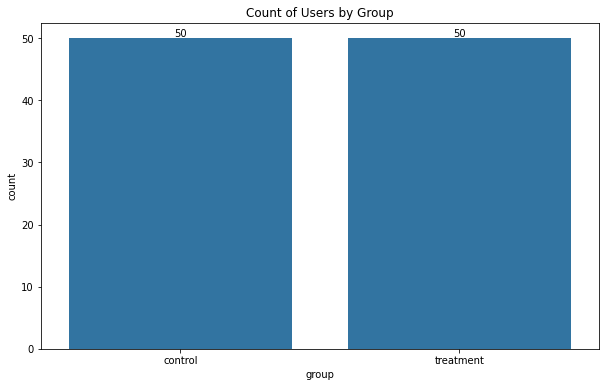

In [281]:
# Set the figure size for the plots
plt.figure(figsize=(10, 6))

# display the plot
ax = sns.countplot(x='group', data=df)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Users by Group')
plt.show()

- The categories in the 'group' column ('control' and 'treatment') are equally distributed. There are **50 records of each category**.

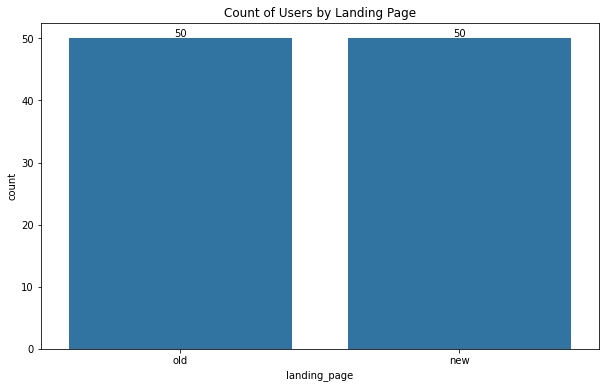

In [282]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='landing_page', data=df)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Users by Landing Page')
plt.show()

- The categories in the 'landing_page' column ('old' and 'new') are also equally distributed. There are 50 records of each category of landing_page.

Now, we'll see if the all the users belonging to 'control group' have 'old landing_page' and if all the users of 'treatment group' have 'new landing_page'

In [283]:
df[(df['group'] == 'control') & (df['landing_page'] != 'old')]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


In [284]:
df[(df['group'] == 'treatment') & (df['landing_page'] != 'new')]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


- All the users belonging to 'control group' also belong to 'old landing_page' and all the users belonging to 'treatment group' belong to 'new landing_page'

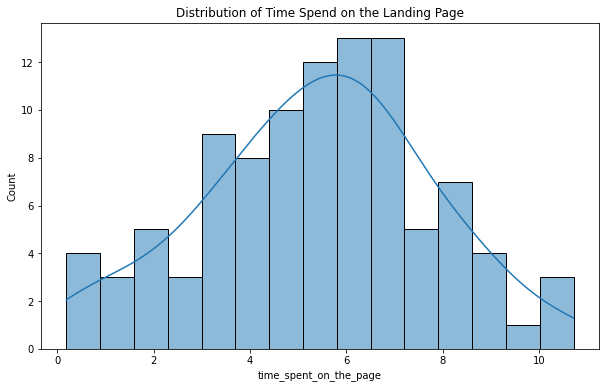

In [285]:
# Checking the distribution for time_spent_on_the_page
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='time_spent_on_the_page', bins=15, kde=True,)
plt.title('Distribution of Time Spend on the Landing Page')
plt.show()

- We can see that the distribution of 'time_spent_on_the_page' is approximately normally distributed with most of the users spending 5-7 minutes on the landing page

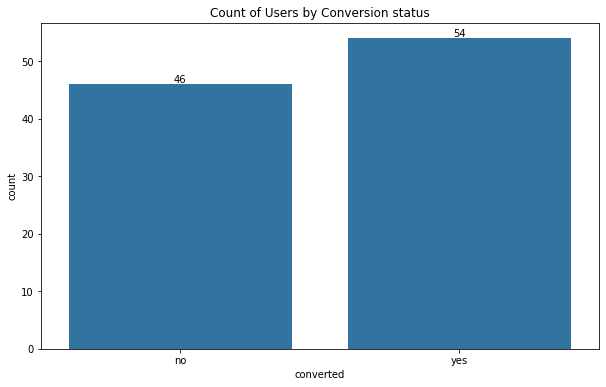

In [286]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='converted', data=df)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Users by Conversion status')
plt.show()

- 54 users in the sample got converted and 46 of the users didn't convert

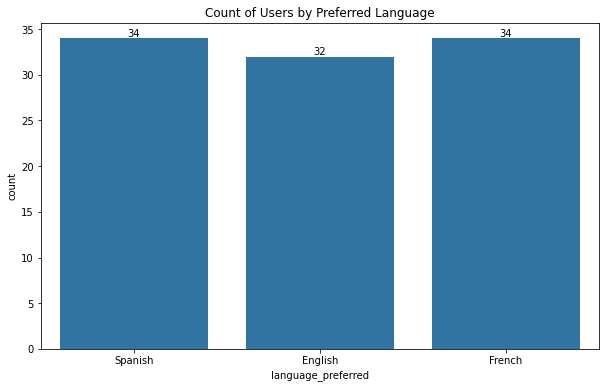

In [287]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='language_preferred', data=df)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Users by Preferred Language')
plt.show()

- There are three languages preferred by the users: Spanish, English and French and the  distribution of users by Preferred Language is almost equal

### Bivariate Analysis

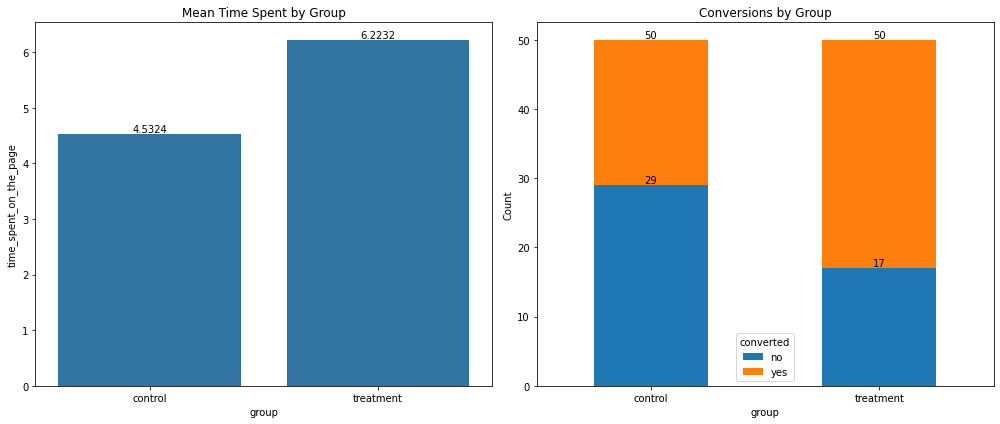

In [288]:
# Analyzing time spent and conversions for different groups
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# --- Bar plot of mean time spent ---
sns.barplot(
    x='group', 
    y='time_spent_on_the_page', 
    data=df, 
    estimator='mean', 
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('Mean Time Spent by Group')

for container in axes[0].containers:
    axes[0].bar_label(container)
    
# --- Stacked bar chart of conversions --- 
cross_tab = pd.crosstab(df['group'], df['converted'])

cross_tab.plot(kind='bar', stacked=True, ax=axes[1]) 
axes[1].set_title('Conversions by Group')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

for container in axes[1].containers:
    axes[1].bar_label(container)
    
plt.tight_layout()
plt.show()


- The mean time spent by users in treatment group is more than the mean time spent by users of the contol group by ~1.7 minutes.
- In the given sample, we can see that more users from the treatment group have been converted (subscribed) than the users from control group.

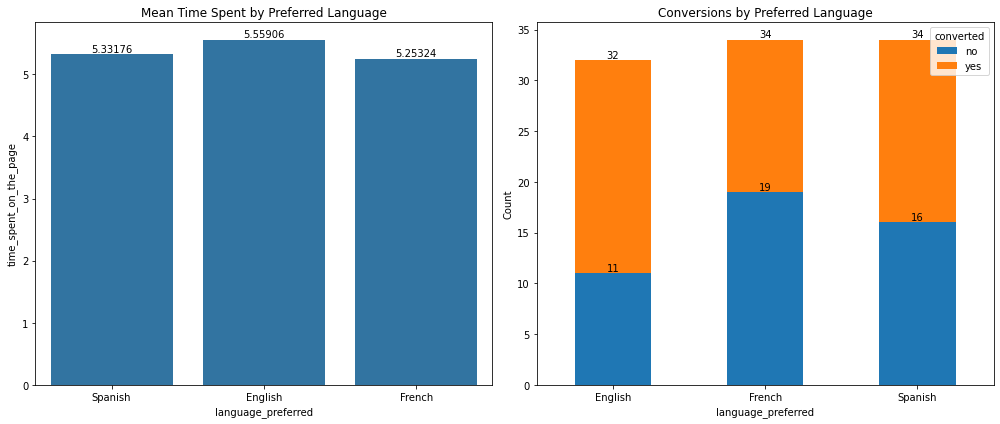

In [289]:
# Analyzing mean time and conversions by the language preferred
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# --- Bar plot of mean time spent ---
sns.barplot(
    x='language_preferred', 
    y='time_spent_on_the_page', 
    data=df, 
    estimator='mean', 
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('Mean Time Spent by Preferred Language')

for container in axes[0].containers:
    axes[0].bar_label(container)
    
# --- Stacked bar chart of conversions --- 
cross_tab = pd.crosstab(df['language_preferred'], df['converted'])

cross_tab.plot(kind='bar', stacked=True, ax=axes[1]) 
axes[1].set_title('Conversions by Preferred Language')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

for container in axes[1].containers:
    axes[1].bar_label(container)
    
plt.tight_layout()
plt.show()


- There isn't much difference in the mean time spent by users of different Preferred Language.
- Users who prefer English have the highest conversion: 21, followed by Spanish: 18  and then French: 15

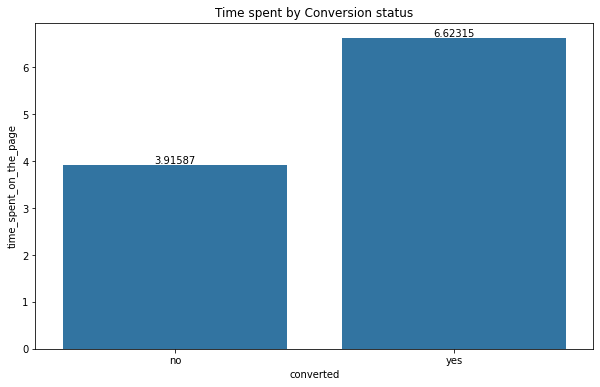

In [290]:
# Comparing time spent with conversion status
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='converted', 
    y='time_spent_on_the_page', 
    data=df, 
    estimator='mean', 
    errorbar=None
)
for container in ax.containers:
    ax.bar_label(container)

plt.title('Time spent by Conversion status')
plt.show()

- Users who spend more time on the Landing page are more likely to get converted.

### EDA Summary

- The given sample of data has 50 users in the 'control' group and 50 users in the 'treatment' group.
- All the 50 users of control group used the 'old' landing page and all the 50 users of the treatment group used the 'new' landing page.
- The distribution of the time_spent_on_the_page is appx. Normal.
- In the sample/data, 46 users didn't get converted while the other 54 did get converted.
- The distribution of users by the Preferred Language is alomost same (apprx. 35 users of each language: English, Spanish and French).
- The mean time spent on the Landing page is more for the treatment group than the control group.
- There are more conversion in the treatment group than in the control group.
- The mean time spent by users of different language preference is apprx. same (5.2 to 5.5 minutes).
- English users have the highest conversions followed by Spanish users. French users have the lowest conversions.
- The mean time spent on the Landing Page by users who got converted is significantly more (~2.7 minutes) than the mean time spent by users who didn't get converted.

### Do the users spend more time on the new landing page than the old landing page?

We'll first Visually analyze the difference in the mean time of the two groups

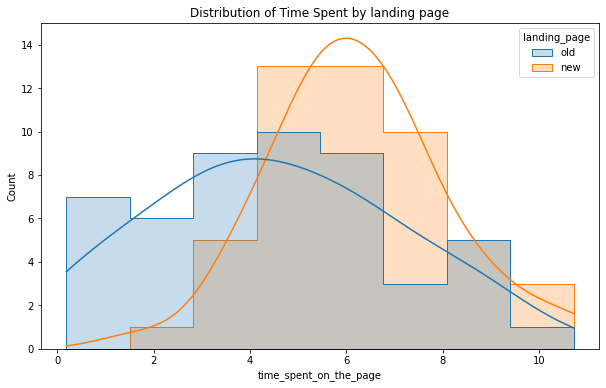

In [291]:
# plotting a distribution plot for old and new landing page

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_spent_on_the_page', hue='landing_page', kde=True, element='step')
plt.title('Distribution of Time Spent by landing page')
plt.show()

- In the above distribution of 'group' vs 'time_spent_on_the_page', we can see that the variance for the 'new' landing page is less than the variance for the 'old' landing page and the mean(of Time Spent on Landing Page) for the treatment group is higher than the mean for the control group.
- We will perform hypothesis tests to verify if this difference in the mean time spent on the two different landing pages is statistically significant.

#### **Let's write the Null and Alternate hypothesis**

Let $\mu_{old}$ be the mean time spent on the old landing page by the control group and $\mu_{new}$ be the mean time spent on the new landing page by the treatment group

We will test the **null hypothesis**: Mean time spent on new page ≤ old page,

>$H_0: \mu_{old} \leq \mu_{new}$

against the **alternate hypothesis**: Mean time spent on new page > old page

>$H_a: \mu_{new} > \mu_{old}$

#### Selecting the appropriate test

Let us look at the data we have
- It is given that the sample observations are independent of each other.
- 'time_spent_on_the_page' is a continuous variable.
- There are 50 samples in each category of the group: treatment(new landing page) and control(old landing page).
- The population standard deviation is not known. For this reason, we will use **two-sample independent t-test**.
- This will be a **one-tailed test** since we are only interested to know if the users spend more time on the new landing page than the old landing page.
- We will use a significance level(alpha) of 0.05.

#### Let's find the p-value

In [292]:
# Split into groups
new_page_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_page_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# One-sided two-sample independent t-test (H1: treatment > control)
t_stat, p_val = stats.ttest_ind(
    new_page_time, 
    old_page_time, 
    equal_var=False, 
    alternative='greater'
)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: 3.7868
p-value: 0.4671


#### Conclusion

- As the p-value of 0.0001 is much less than the significance level, we will **reject the null hypothesis**. i.e., we have enough statistical evidence to conclude that the **mean time spent on the new landing page by the treatment group is greater than the mean time spent on the old landing page by the control group** at 0.05 level of significance.

### Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

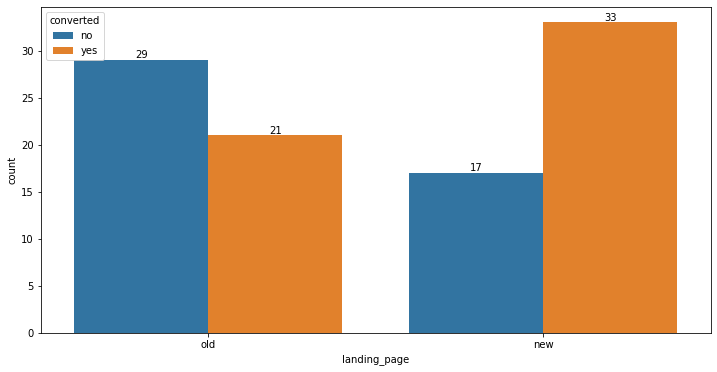

In [293]:
# plotting a countplot to see the conversion status of users of different landing page

plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df,
    x="landing_page",             
    hue="converted",       
)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

- Visually, we can see that the users of the new landing page have a higher chance of converting (33/50 = 66%) than the users of the old landing page (21/50 = 42%). Let us do further hypothesis testing to see if the difference observed is statistically significant.

#### **Hypothesis:**

Let $p_{new}$ be the conversion rate on the new landing page and $p_{old}$ be the conversion rate on the old landing page.  

- **Null hypothesis**: The conversion rate for the new landing page is less than or equal to the conversion rate for the old landing page.
>$ H_0 = p_{new} \leq p_{old}$
- **Alternative hypothesis**: The conversion rate for the new landing page is greater than the conversion rate for the old landing page.
>$H_a = p_{new} > p_{old}$)

#### Select appropriate test

- The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a **two-sample Z-test for proportions** for this problem.
- This will be a one-tailed test with a singnificance level, $\alpha = 0.05$

#### Preparing data for test

In [294]:
# Counts of conversions
conversions_old = df.loc[(df['landing_page'] == 'old') & (df['converted'] == 'yes'), 'user_id'].count()
conversions_new = df.loc[(df['landing_page'] == 'new') & (df['converted'] == 'yes'), 'user_id'].count()

print(f"Conversions for old landing page: {conversions_old}")
print(f"Conversions for new landing page: {conversions_new}\n")

# Sample sizes
n_old = (df['landing_page'] == 'old').sum()
n_new = (df['landing_page'] == 'new').sum()

# Run two-sample z-test for proportions
count = np.array([conversions_new, conversions_old])
nobs = np.array([n_new, n_old])

print(f"The number of users of old landing page and the number of users of the new landing page are {n_old} and {n_new} respectively\n")

print(f"The proportions of conversions for old landing page and the new landing page are {conversions_old/n_old} and {conversions_new/n_new} respectively")

Conversions for old landing page: 21
Conversions for new landing page: 33

The number of users of old landing page and the number of users of the new landing page are 50 and 50 respectively

The proportions of conversions for old landing page and the new landing page are 0.42 and 0.66 respectively


#### Finding the p-value

In [295]:
stat, p_val = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-statistic: {stat:.4f}")
print(f"p-value: {p_val:.4f}")

Z-statistic: 2.4077
p-value: 0.0080


#### Conclusion

- Since the p-value of 0.008 is less than the significance level of 0.05, we **reject the Null Hypothesis** in favor of the Alternate Hypothesis.  
- We have enough statistical evidence to say that the **proportion of conversion for the new landing page is higher than the proportion of conversion for the old landing page**.

### Does the converted status depend on the preferred language?

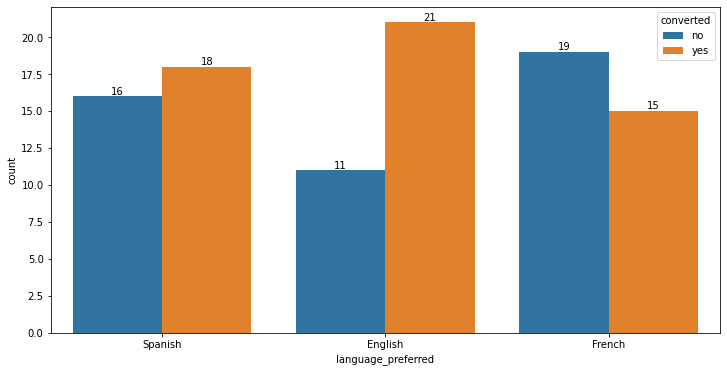

In [296]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df,
    x="language_preferred",             
    hue="converted",       
)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

- From the vizualization, we can see that users who prefer English are more likely to get converted than the users of Spanish preference. French language preferrers are the least likely to get converted.

#### **Hypothesis:**

- **Null hypothesis**- $H_0$: The conversion status is independent of the preferred language.

- **Alternative hypothesis**- $H_a$: The conversion status depends on the preferred language.

### Select appropriate test

- The data is categorical: Conversion status v/s Language preferred
- The data is a random sample and the observations are independent of each other
- The value(frequency) of each cell in the contigency table more than 5
- **Chi-squared test for Independence** is the most appropriate test for this case
- We will use a significane level of 0.05

### Find the p-value

In [297]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

print("Contingency Table:\n")
contingency_table

Contingency Table:



language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [298]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Expected Frequencies:\n")
print(pd.DataFrame(expected, index=['no', 'yes'], columns=['English', 'French', 'Spanish']))
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p:.4f}")

Expected Frequencies:

     English  French  Spanish
no     14.72   15.64    15.64
yes    17.28   18.36    18.36

Chi-Square Statistic: 3.0930
Degrees of Freedom: 2
p-value: 0.2130


#### Conclusion

- Since the p-value is 0.213 (which is greater than $\alpha$), we fail to reject the Null hypothesis at the given significance level of 0.05.  
- So we conclude that the **conversion status does not depend on the language preferred by the user**.

### Is the mean time spent on the new page same for the different language users?

In [299]:
# Filter the dataframe to create a new subset containing only the data for new landing page
df_new = df.loc[df['landing_page'] == 'new']

  language_preferred  time_spent_on_the_page
0            English                6.663750
1             French                6.196471
2            Spanish                5.835294 



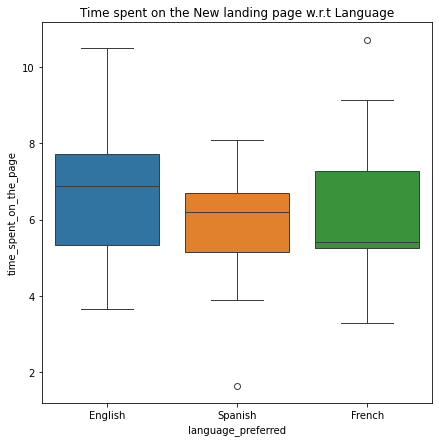

In [300]:
# calculate the mean time for each language group
print(df_new.groupby('language_preferred')['time_spent_on_the_page'].mean().reset_index(),'\n')

# plot box plot for time spent for each language group
plt.figure(figsize=(7, 7))
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred')
plt.title('Time spent on the New landing page w.r.t Language')
plt.show()

- There seems to be some difference in the mean time spent on the new landing page across different language users. We will do further analysis to test if this difference is statistically significant.

### **Hypothesis:**


**Null Hypothesis**: The mean time spent on the new landing page is the same for different language users.
>$H_0: \mu_{English} = \mu_{French} = \mu_{Spanish}$

**Alternate Hypothesis**: At least one user group of language has different mean time spent on the page.

We will set the significance level to 0.05.

### Select Appropriate test
- We'll do Shapiro-Wilk's test to see if time_spent_on_the_page is normally distriubted
- Levene's test will be done to see if the variances of the time_spent_on_the_page for different language users is different

#### Shapiro-Wilk’s test ($\alpha$ = 0.05)

We will test the null hypothesis

>$H_0:$ Time spent on the new landing page follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Time spent on the new landing page does not follow a normal distribution

In [301]:
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


- Since the p_value is greater than 0.05 for all the three languages, we do not reject the Null hypothesis, i.e., the **distribution of time_spent_on_the_page for all the three languages for the new landing page is Normal**

#### Levene's test ($\alpha$ = 0.05)

We will test the null hypothesis

>$H_0$: All the population variances of time_spent_on_the_page for different language users are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [302]:
# Filter the time spent by each language group
english_time = df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page']
spanish_time = df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page']
french_time =  df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page']

# Perform Levene's test for homogeneity of variance
statistic, p_value = stats.levene(english_time, spanish_time, french_time)                                  
print(f"p-value = {p_value:.4f}")

p-value = 0.4671


- Since the p-value is more than the significance level, we **fail to reject the Null hypothesis of the homogeneity of variances**. 

- time_spent_on_the_page is a continuous variable and it is normally distributed.
- The continuous variable is also normally distributed.
- The observations are independent.
- The population variances for time_spent_on_the_page for different language users is different.
- We want to test the means across more than two groups, we will use **One-way Anova test**.

### Calculate the p-value

In [303]:
test_stat, p_value = stats.f_oneway(english_time, spanish_time, french_time)
print(f"p-value = {p_value:.4f}")

p-value = 0.4320


- Since the p-value is not less than the significance level of 0.05, we fail to reject the null hypothesis.
- We conclude that the **mean time spent on the new landing page is not different for different language users**.

## Conclusion and Business Recommendation

- The given sample of data has **50 users** of **'control group'** who used the **'old landing page'** and **50 users** of **'treatment group'** who used the **'new landing page'**.
- We conducted different **hypothesis tests** to check for **statistically significant differences** between the different groups in the sample.
- Using **two-sampled independent t-test**, we concluded that the **mean time spent by users of the new landing page is more than the mean time spent by the users of the old landing page**.
- Using **two-sampled Z-test for proportions**, we found out that the **conversion rate for the users of the new landing page is higher than the conversion rate for the users of the old landing page**.
- Using **Chi-squared test for Independence**, we saw that the **chances of a user getting converted is not dependent on the language** they prefer.
- Using **One-way Anova test**, we concluded that the **mean time spent on the new landing page is not different for different language users**.
- Based on the tests for langing page V/s time spent and landing page V/s conversion status, it is **recommended for the company to change the landing page from the older version to the newer version** with new outline and more relevant content. This way, the company is more likely to get more subscribers and to make more profit.